# 복습 문제

<1> 분석의 기본 단위로써, NLTK 패키지에서 자연어 분석을 위해 만든 문서 집합을 말하며 '말뭉치'라는 뜻의 서브 패키지는?
- corpus

<2> 비정형 데이터를 머신러닝에 적용시키기 위한 텍스트 분석의 일환이다 순서대로 배열하시오
ㄱ. 피처 벡터화/추출
ㄴ. 머신러닝 모델 수립 및 학습/예측/평가
ㄷ. 텍스트 전처리
- ㄷ, ㄱ, ㄴ

In [4]:
## <3> 
from nltk import word_tokenize
from nltk.stem import PorterStemmer

text =  "Now I am going to have dinner with my wife. Thanks for having me here." 

words = word_tokenize(text)

stemmer = PorterStemmer()

li = []
for word in words:
    st_word = stemmer.stem(word)
    li.append(st_word)
    
li

['now',
 'i',
 'am',
 'go',
 'to',
 'have',
 'dinner',
 'with',
 'my',
 'wife',
 '.',
 'thank',
 'for',
 'have',
 'me',
 'here',
 '.']

In [11]:
sentence = "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop. " 

import re
sentence = re.sub('[^a-zA-Z]', ' ', sentence)

words = word_tokenize(sentence)

len(words)

23

In [50]:
## <4>
from scipy import sparse

### COO 형식
data = [5, 2, 3]
row = [2, 2, 3]
col = [3, 4, 2]

sparse.coo_matrix((data, (row, col)), (6, 6)).toarray()

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 5, 2, 0],
       [0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [60]:
## CSR 형식
import numpy as np

data = np.array([5, 2, 3])
row_ = np.array([0, 0, 0, 2, 3, 3])
col = np.array([3, 4, 2])

sparse.csr_matrix((data, col, row_), (5, 6)).toarray()

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 5, 2, 0],
       [0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

<5> 문서와 문서 간의 유사도 비교는 일반적으로 (_____)를 사용한다
- 코사인 유사도

<6> 텍스트 분석 패키지 중 주로 소셜 미디어 텍스트에 대한 감성분석을 제공하고, 뛰어난 감성 분석 결과 및 빠른 수행 시간으로 대용량 텍스트 데이터에 잘 사용되는 패키지
- 토픽 모델링, VADER

<7> 자연어를 기계가 이해할 수 있는 숫자의 나열인 벡터로 바꾸어 주어야 함
- 피처 벡터화, 워드 임베딩

<8> 두 문장에서 같은 단어가 자주 나타나면 코사인 유사도가 높다/낮다
- 높다

<9> KMeans 객체의 clusters_centers 속성은 0에서 1의 값을 가지며 0에 가까울수록 중심에 가까운 값이다. (O,X) 
- X

In [3]:
## CSR
import numpy as np
from scipy import sparse

data = np.array([4, 5, 2, 3])
row_ = np.array([0, 0, 0, 3, 4, 4])
col = np.array([2, 3, 4, 2])

sparse.csr.csr_matrix((data, col, row_), (5, 6)).toarray()

C:\Users\admin\AppData\Local\Temp\ipykernel_3680\3259134799.py:9: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  sparse.csr.csr_matrix((data, col, row_), (5, 6)).toarray()


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 4, 5, 2, 0],
       [0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [8]:
data = np.array([1, 2, 4, 5, 2, 3])
row_ = np.array([0, 2, 2, 5, 5, 6])
col = np.array([0, 1, 2, 3, 4, 2])

sparse.csr.csr_matrix((data, col, row_), (5, 6)).toarray()

C:\Users\admin\AppData\Local\Temp\ipykernel_3680\1709265780.py:5: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  sparse.csr.csr_matrix((data, col, row_), (5, 6)).toarray()


array([[1, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 4, 5, 2, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0]])

# 수업

## 추천 시스템

### 추천 시스템의 유형

- 콘텐츠 기반 필터링(Content Based Filtering)
- 협업 필터링(Collaborative Filtering)
> - 최근접 이웃(Nearest Neighbor) 필터링
> - 잠재 요인(Latent Factor) 필터링

### 콘텐츠 기반 필터링 추천 시스템

- 콘텐츠 기반 필터링 방식은 사용자가 특정한 아이템을 매우 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천하는 방식임
> 예를들어 사용자가 특정 영화에 높은 평점을 줬다면 그 영화의 장르, 출연 배우, 감독, 영화 키워드 등의 콘텐츠와 유사한 다른 영화를 추천해줌

### 최근접 이웃 협업 필터링

- 사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은 사용자 행동 양식(User Behavior)만을 기반으로 추천을 수행하는 것이 **협업 필터링(Collaborative Filtering)** 방식임
- **협업 필터링의 주요 목표** : 사용자-아이템 평점 매트릭스와 같은 축적된 사용자 행동 데이터를 기반으로 사용자가 아직 평가하지 않은 아이템을 예측 평가하는 것임

- 협업 필터링 기반의 추천 시스템은 **최근접 이웃 방식**과 **잠재 요인 방식**으로 나뉘며, 두 방식 모두 사용자-아이템 평점 행렬 데이텅에만 의지해 추천을 수행함

- 일반적으로 이러한 사용자-아이템 평점 행렬은 많은 아이템을 열로 가지는 다차원 행렬이며, 사용자가 아이템에 대한 평점을 매기는 경우가 많지 않기 때문에 희소 행렬 특성을 갖고 있음

**<사용자 기반(User-User)>**
- 당신과 비슷한 고객들이 다음 상품도 구매했습니다
- Customers like you also bought these items
- 특정 사용자와 유사한 다른 사용자를 TOP-N으로 선정해 이 TOP-N 사용자가 좋아하는 아이템을 추천하는 방식

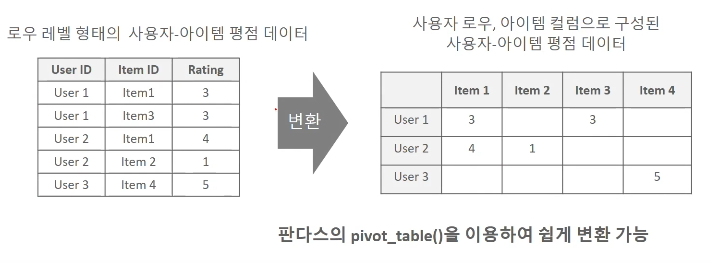

In [122]:
import requests
from io import BytesIO
from PIL import Image
import time

# 다운받을 이미지 url
url = "https://s1.md5.ltd/image/69a9e183b1ac2eecb671ce4e060a677b.PNG"
# time check
start = time.time()

# request.get 요청
res = requests.get(url)

#Img open
request_get_img = Image.open(BytesIO(res.content))
request_get_img

**<아이템 기반(Item-Item)>**
- 이 상품을 선택한 다른 고객들은 다음 상품도 구매했습니다
- Customers who bought this item also bought these items
- 사용자들이 그 아이템을 좋아하는지/싫어하는지의 평가 척도가 유사한 아이템을 추천하는 기준이 되는 알고리즘임

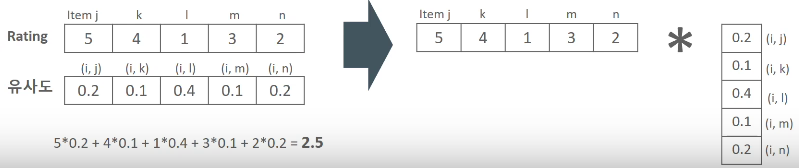

In [123]:
import requests
from io import BytesIO
from PIL import Image
import time

# 다운받을 이미지 url
url = "https://s1.md5.ltd/image/f18d3ea93ed9b0149bd6605ad24a4439.PNG"
# time check
start = time.time()

# request.get 요청
res = requests.get(url)

#Img open
request_get_img = Image.open(BytesIO(res.content))
request_get_img

- 일반적으로 사용자 기반보다 아이템 협업 필터링이 정확도가 더 높음
- 따라서 최근접 이웃 협업 필터링은 대부분 아이템 기반의 알고리즘을 적용함

## 잠재 요인 협업 필터링

잠재 요인 협업 필터링은 사용자-아이템 평점 매트리스 속에 숨어 있는 잠재 요인을 추출해 추천 예측을 할 수 있게 하는 기법임
- 행렬 분해(Matrix Factorization) : 대규모 다차원 행렬을 SVD와 같은 차원 감소 기법으로 분해하는 과정에서 잠재 요인을 추출하는 기법
- 잠재 요인을 기반으로 다차원 희소 행렬(사용자-아이템 행렬)을 저차원 밀집 행렬(사용자-잠재요인 행렬)의 행렬과 전치 행렬(아이템-잠재 요인 행렬)로 분해할 수 있음
- 분해된 두 행렬의 내적을 통해 새로운 예측 사용자-아이템 평점 행렬 데이터를 만들어서 사용자가 아직 평점을 부여하지 않은 아이템에 대한 예측 평점을 생성하는 것이 잠재 요인 협력 필터링 알고리즘임
- 행렬 분해는 주로 SVD(Singluar Value Decomposition) 방식 이용하나 NULL 값이 있는 경우 확률적 경사 하강법이나 ALS(Alternating Least Squares) 방식을 이용해 SVD를 수행함

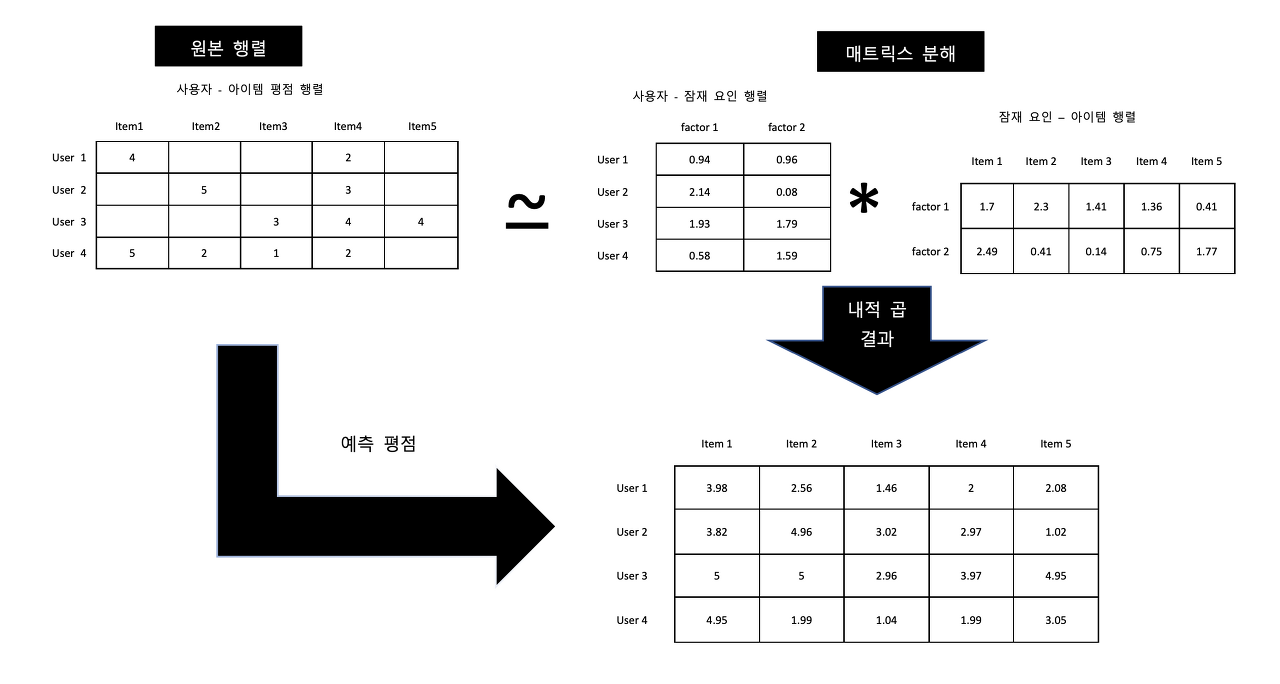

In [125]:
import requests
from io import BytesIO
from PIL import Image
import time

# 다운받을 이미지 url
url = "https://blog.kakaocdn.net/dn/SpVJY/btroJBbrU6i/FXkb4hTnacl4yjkPyEHuC1/img.png"
# time check
start = time.time()

# request.get 요청
res = requests.get(url)

#Img open
request_get_img = Image.open(BytesIO(res.content))
request_get_img

### 확률적 경사 하강법을 이용한 행렬 분해

- P와 Q 행렬로 계산된 예측 R 행렬 값이 실제 R 행렬 값과 가장 최소의 오류를 가질 수 있도록 반복적인 비용 함수 최적화를 통해 P와 Q를 유추해내는 것

<확률적 경사 하강법(SGD)를 이용한 행렬 분해의 전반적인 절차>
1. P와 Q를 임의의 값을 가진 행렬로 설정
2. P와 Q, T 값을 곱해 예측 R 행렬을 계산하고 예측 R 행렬과 실제 R 행렬에 해당하는 오류 값을 계산함
3. 이 오류 값을 최소화할 수 있도록 P와 Q 행렬을 적절한 값으로 각각 업데이트 함
4. 만족할 만한 오류 값을 가질 때까지 2, 3번 작업을 반복하면서 P와 Q 값을 업데이트 해 근사화 함

In [130]:
import numpy as np

# 원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재 요인 차원 K는 3으로 설정
R = np.array([[4, np.NaN, np.NaN, 2, np.NaN],
            [np.NaN, 5, np.NaN, 3, 1],
            [np.NaN, np.NaN, 3, 4, 4],
            [5, 2, 1, 2, np.NaN]])

num_users, num_items = R.shape
K = 3

# P와 Q 행렬의 크기를 지정하고 정규 분포를 가진 임의의 값으로 입력
np.random.seed(1)
P = np.random.normal(scale = 1./K, size = (num_users, K))
Q = np.random.normal(scale = 1./K, size = (num_items, K))

In [132]:
from sklearn.metrics import mean_squared_error

#### 실제 R 행렬과 예측 행렬의 오차를 구하는 함수
def get_rmse(R, P, Q, non_zeros):
    error = 0
    # 두 개의 분해된 행렬 P와 Q, T의 내적으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P, Q.T)
    
    # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출해 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
    
    return rmse

In [134]:
#### SGD 기반으로 행렬 분해 수행

# R > 0인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장
non_zeros = [ (i, j, R[i, j]) for i in range(num_users) for j in range(num_items) if R[i, j] > 0]

steps = 1000
learning_rate = 0.01
r_lambda = 0.01

# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트
for step in range(steps):
    for i, j, r in non_zeros:
        # 실제 값과 예측 값의 차이인 오류 값 구함
        eij = r - np.dot(P[i, :], Q[j, :].T)
        # Regularization을 반영한 SGD 업데이트 공식 적용
        P[i, :] = P[i, :] + learning_rate*(eij * Q[j, :] - r_lambda*P[i, :])
        Q[j, :] = Q[j, :] + learning_rate*(eij * P[i, :] - r_lambda*Q[j, :])
        
        rmse = get_rmse(R, P, Q, non_zeros)
        if (step % 50) == 0:
            print('### iteration step : ', step, 'rmse : ', rmse)

### iteration step :  0 rmse :  3.261355059488935
### iteration step :  0 rmse :  3.26040057174686
### iteration step :  0 rmse :  3.253984404542389
### iteration step :  0 rmse :  3.2521583839863624
### iteration step :  0 rmse :  3.252335303789125
### iteration step :  0 rmse :  3.251072196430487
### iteration step :  0 rmse :  3.2492449982564864
### iteration step :  0 rmse :  3.247416477570409
### iteration step :  0 rmse :  3.241926055455223
### iteration step :  0 rmse :  3.2400454107613084
### iteration step :  0 rmse :  3.240166740749792
### iteration step :  0 rmse :  3.2388050277987723
### iteration step :  50 rmse :  0.5003190892212748
### iteration step :  50 rmse :  0.5001616291326989
### iteration step :  50 rmse :  0.49899601202578087
### iteration step :  50 rmse :  0.4988483450145831
### iteration step :  50 rmse :  0.49895189256631756
### iteration step :  50 rmse :  0.49833236830090993
### iteration step :  50 rmse :  0.4984148489378701
### iteration step :  50 rmse 

In [135]:
non_zeros

[(0, 0, 4.0),
 (0, 3, 2.0),
 (1, 1, 5.0),
 (1, 3, 3.0),
 (1, 4, 1.0),
 (2, 2, 3.0),
 (2, 3, 4.0),
 (2, 4, 4.0),
 (3, 0, 5.0),
 (3, 1, 2.0),
 (3, 2, 1.0),
 (3, 3, 2.0)]

In [138]:
pred_matrix = np.dot(P, Q.T)
print('예측 행렬 : \n', np.round(pred_matrix, 3))

예측 행렬 : 
 [[3.991 0.897 1.306 2.002 1.663]
 [6.696 4.978 0.979 2.981 1.003]
 [6.677 0.391 2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.14 ]]


## 콘텐츠 기반 필터링 실습 - 장르 속성을 이용한 영화 콘텐츠 기반 필터링

### 데이터 로딩 및 가공

In [110]:
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings('ignore')

movies = pd.read_csv('./data/tmdb_5000_movies.csv')
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [111]:
movies_df = movies[['id', 'title', 'genres', 'vote_average', 'vote_count',
                   'popularity', 'keywords', 'overview']]
movies_df.head(2)

,id,title,genres,vote_average,vote_count,popularity,keywords,overview
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",7.2,11800,150.437577,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",6.9,4500,139.082615,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha..."


In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [108]:
movies_df.genres[0]

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

- list 안에 dictionary 형태들이 있는 것처럼 보이지만 그냥 문자형임

In [15]:
movies.genres[0][0]

'['

In [112]:
from ast import literal_eval  ## 파이썬 형태의 문자형을 넣어주면 파이썬 객체로 바꿔줌

movies_df['genres'] = movies_df['genres'].apply(literal_eval)
movies_df['keywords'] = movies_df['keywords'].apply(literal_eval)

In [114]:
print(type(movies_df.genres[0]))
print(type(movies_df.genres[0][0]))

<class 'list'>
<class 'dict'>


In [30]:
for i in movies_df['genres'][0]:
    print(i['name'])

Action
Adventure
Fantasy
Science Fiction


In [34]:
[i['name'] for i in movies_df['genres'][0]]

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [115]:
movies_df['genres'] = movies_df['genres'].apply(lambda x: [y['name'] for y in x])
movies_df['keywords'] = movies_df['keywords'].apply(lambda x: [y['name'] for y in x])

In [116]:
movies_df[['genres', 'keywords']][:1]

,genres,keywords
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon..."


### 장르 콘텐츠 유사도 측정
- 문자열로 변환된 genres 칼럼을 Count 기반으로 피처 벡터화 변환
- genres 문자열을 피처 벡터화 행렬로 변환한 데이터 세트를 코사인 유사도를 통해 비교함. 이를 위해 데이터 세트의 레코드별로 타 레코드와 장르에서 코사인 유사도 값을 가지는 객체를 생성함
- 장르 유사도가 높은 영화 중에 평점이 높은 순으로 영화를 추천

In [85]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer를 적용하기 위해 공백문자를 word 단위가 구분되는 문자열로 반환
movies_df['genres_literal'] = movies_df['genres'].apply(lambda x: ' '.join(x))

count_vect = CountVectorizer(min_df = 0, ngram_range = (1, 2))
# min_df : float in range [0.0, 1.0] or int, default=1
    # When building the vocabulary ignore terms that have a document
    # frequency strictly lower than the given threshold. This value is also
    # called cut-off in the literature.

genre_mat = count_vect.fit_transform(movies_df['genres_literal'])
genre_mat.toarray()

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
from sklearn.metrics.pairwise import cosine_similarity

genre_sim = cosine_similarity(genre_mat, genre_mat)
print(genre_sim.shape)
print(genre_sim)

(4803, 4803)
[[1.         0.59628479 0.4472136  ... 0.         0.         0.        ]
 [0.59628479 1.         0.4        ... 0.         0.         0.        ]
 [0.4472136  0.4        1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [53]:
np.argsort(genre_sim) ## 위의 genre_sim을 오름차순으로 정렬한 값들의 index

array([[2401, 3037, 3038, ...,  813, 3494,    0],
       [2401, 3067, 3069, ...,  129,    1,  262],
       [2401, 2999, 3000, ..., 1542, 1740,    2],
       ...,
       [   0, 2230, 2229, ..., 1895, 3809, 4800],
       [   0, 3205, 3204, ..., 1596, 1594, 4802],
       [   0, 3141, 3140, ..., 4521, 4710, 4802]], dtype=int64)

In [54]:
np.argsort(genre_sim)[:, ::-1]  ## genre_sim을 내림차순으로 정렬한 값들의 index

array([[   0, 3494,  813, ..., 3038, 3037, 2401],
       [ 262,    1,  129, ..., 3069, 3067, 2401],
       [   2, 1740, 1542, ..., 3000, 2999, 2401],
       ...,
       [4800, 3809, 1895, ..., 2229, 2230,    0],
       [4802, 1594, 1596, ..., 3204, 3205,    0],
       [4802, 4710, 4521, ..., 3140, 3141,    0]], dtype=int64)

In [58]:
a = np.array([11, 10, 13, 12])
np.sort(a)

array([10, 11, 12, 13])

In [60]:
np.argsort(a)[::-1]

array([2, 3, 0, 1], dtype=int64)

In [64]:
a[np.argsort(a)[::-1]]

array([13, 12, 11, 10])

In [65]:
movies_df.iloc[np.argsort(genre_sim)[:, ::-1][0], :] 

,id,title,genres,vote_average,vote_count,popularity,keywords,overview,genres_literal
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]",7.2,11800,150.437577,"[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",Action Adventure Fantasy Science Fiction
3494,27549,Beastmaster 2: Through the Portal of Time,"[Action, Adventure, Fantasy, Science Fiction]",4.6,17,1.478505,"[based on novel, time travel, sequel, psychotr...","Mark Singer returns as Dar, the warrior who ca...",Action Adventure Fantasy Science Fiction
813,1924,Superman,"[Action, Adventure, Fantasy, Science Fiction]",6.9,1022,48.507081,"[saving the world, journalist, dc comics, crim...",Mild-mannered Clark Kent works as a reporter a...,Action Adventure Fantasy Science Fiction
870,8536,Superman II,"[Action, Adventure, Fantasy, Science Fiction]",6.5,629,30.515175,"[saving the world, dc comics, sequel, superher...",Three escaped criminals from the planet Krypto...,Action Adventure Fantasy Science Fiction
46,127585,X-Men: Days of Future Past,"[Action, Adventure, Fantasy, Science Fiction]",7.5,6032,118.078691,"[1970s, mutant, time travel, marvel comic, bas...",The ultimate X-Men ensemble fights a war for t...,Action Adventure Fantasy Science Fiction
...,...,...,...,...,...,...,...,...,...
3041,27322,Love Jones,"[Comedy, Drama, Romance]",8.1,12,1.000178,"[sex, ex-boyfriend, independent film, african ...",Darius Lovehall is a young black poet in Chica...,Comedy Drama Romance
3039,75900,My Week with Marilyn,[Drama],6.6,406,21.006078,"[based on novel, biography, historical figure,...",Sir Laurence Olivier is making a movie in Lond...,Drama
3038,17710,Hey Arnold! The Movie,"[Animation, Family]",5.6,62,5.856363,[],When a powerful developer named Mr. Scheck wan...,Animation Family
3037,19905,"The Goods: Live Hard, Sell Hard",[Comedy],5.4,58,3.352702,[duringcreditsstinger],Who is Don Ready? Salesman? Lover? Song Stylis...,Comedy


In [117]:
genre_sim_sorted_ind = genre_sim.argsort()[:, ::-1]
genre_sim_sorted_ind[:1]

array([[   0, 3494,  813, ..., 3038, 3037, 2401]], dtype=int64)

- 0번 레코드의 경우 자신인 0번 레코드를 제외하면 3494번 레코드가 가장 유사도가 높고, 그 다음이 813번이며, 가장 유사도가 낮은 레코드는 2401번임

### 장르 콘텐츠 필터링을 이용한 영화 추천

In [95]:
def find_sim_movie(df, sorted_ind, title_name, top_n = 10):
    # 인자로 입력된 movies_df DataFrame에서 'title' 컬럼이 입력된 title_name 값인 DataFrame추출
    title_movie = df[df['title'] == title_name]
    
    # title_named을 가진 DataFrame의 index 객체를 ndarray로 반환하고 
    # sorted_ind 인자로 입력된 genre_sim_sorted_ind 객체에서 유사도 순으로 top_n 개의 index 추출
    title_index = title_movie.index.values
    similar_indexes = sorted_ind[title_index, :(top_n)]
    
    # 추출된 top_n index들 출력. top_n index는 2차원 데이터 임. 
    #dataframe에서 index로 사용하기 위해서 1차원 array로 변경
    print(similar_indexes)
    similar_indexes = similar_indexes.reshape(-1)
    
    return df.iloc[similar_indexes] 

In [96]:
similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather', 10)
similar_movies[['title', 'vote_average']]

[[2731 1243 3636 1946 2640 4065 1847 4217  883 3866]]


,title,vote_average
2731,The Godfather: Part II,8.3
1243,Mean Streets,7.2
3636,Light Sleeper,5.7
1946,The Bad Lieutenant: Port of Call - New Orleans,6.0
2640,Things to Do in Denver When You're Dead,6.7
4065,Mi America,0.0
1847,GoodFellas,8.2
4217,Kids,6.8
883,Catch Me If You Can,7.7
3866,City of God,8.1


In [97]:
movies_df[['title', 'vote_average', 'vote_count']].sort_values('vote_average', ascending = False)[:10]

,title,vote_average,vote_count
3519,Stiff Upper Lips,10.0,1
4247,Me You and Five Bucks,10.0,2
4045,"Dancer, Texas Pop. 81",10.0,1
4662,Little Big Top,10.0,1
3992,Sardaarji,9.5,2
2386,One Man's Hero,9.3,2
2970,There Goes My Baby,8.5,2
1881,The Shawshank Redemption,8.5,8205
2796,The Prisoner of Zenda,8.4,11
3337,The Godfather,8.4,5893


- 평가 횟수가 적어 왜곡된 평점 데이터를 회피할 수 있도록 평점에 평가 횟수를 반영할 수 있는 평가 방식이 필요함

In [89]:
C = movies_df['vote_average'].mean()
m = movies_df['vote_count'].quantile(0.6)
print('C :', round(C, 3), 'm : ', round(m, 3))

C : 6.092 m :  370.2


In [119]:
percentile = 0.6
m = movies['vote_count'].quantile(percentile)
C = movies['vote_average'].mean()

def weighted_vote_average(record):
    v = record['vote_count']
    R = record['vote_average']
    
    return ( (v/(v+m)) * R) + ( (m/(m+v)) * C)

movies_df['weighted_vote'] = movies_df.apply(weighted_vote_average, axis = 1)

movies_df[['title', 'vote_average', 
        'weighted_vote', 'vote_count']].sort_values('weighted_vote', ascending = False)[:10]

,title,vote_average,weighted_vote,vote_count
1881,The Shawshank Redemption,8.5,8.396052,8205
3337,The Godfather,8.4,8.263591,5893
662,Fight Club,8.3,8.216455,9413
3232,Pulp Fiction,8.3,8.207102,8428
65,The Dark Knight,8.2,8.136930,12002
1818,Schindler's List,8.3,8.126069,4329
3865,Whiplash,8.3,8.123248,4254
809,Forrest Gump,8.2,8.105954,7927
2294,Spirited Away,8.3,8.105867,3840
2731,The Godfather: Part II,8.3,8.079586,3338


- 장르 유사성이 높은 영화를 top_n의 2배수만큼 후보군으로 선정한 뒤에 weighted_vote 칼럼 값이 높은 순으로 top_n만큼 추출하는 방식으로 변경

In [120]:
def find_sim_movie(df, sorted_ind, title_name, top_n=10):
    title_movie = df[df['title'] == title_name]
    title_index = title_movie.index.values
    
    # top_n의 2배에 해당하는 쟝르 유사성이 높은 index 추출 
    similar_indexes = sorted_ind[title_index, :(top_n*2)]
    similar_indexes = similar_indexes.reshape(-1)
    # 기준 영화 index는 제외
    similar_indexes = similar_indexes[similar_indexes != title_index]
    
    # top_n의 2배에 해당하는 후보군에서 weighted_vote 높은 순으로 top_n 만큼 추출 
    return df.iloc[similar_indexes].sort_values('weighted_vote', ascending=False)[:top_n]

similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather',10)
similar_movies[['title', 'vote_average', 'weighted_vote']] 

,title,vote_average,weighted_vote
2731,The Godfather: Part II,8.3,8.079586
1847,GoodFellas,8.2,7.976937
3866,City of God,8.1,7.759693
1663,Once Upon a Time in America,8.2,7.657811
883,Catch Me If You Can,7.7,7.557097
281,American Gangster,7.4,7.141396
4041,This Is England,7.4,6.739664
1149,American Hustle,6.8,6.717525
1243,Mean Streets,7.2,6.626569
2839,Rounders,6.9,6.530427


## 아이템 기반 최근접 이웃 협업 필터링 실습

### 데이터 가공 및 변환

In [139]:
import pandas as pd
import numpy as np

movies = pd.read_csv('./data/ml-latest-small/ml-latest-small/movies.csv')
ratings = pd.read_csv('./data/ml-latest-small/ml-latest-small/ratings.csv')
print(movies.shape)
print(ratings.shape)

(9742, 3)
(100836, 4)


In [140]:
ratings.head(2)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [141]:
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [142]:
ratings = ratings[['userId', 'movieId', 'rating']]
ratings_matrix = ratings.pivot_table('rating', index = 'userId', columns = 'movieId')
ratings_matrix.head(3)

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
# title 칼럼을 얻기 위해 movies와 조인
rating_movies = pd.merge(ratings, movies, on = 'movieId')

# columns = 'title'로 title 칼럼으로 피벗 수행
ratings_matrix = rating_movies.pivot_table('rating', index = 'userId', columns = 'title')

# NaN 값을 모두 0으로 변환
ratings_matrix = ratings_matrix.fillna(0)
ratings_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 영화 간 유사도 산출

- 영화를 기준으로 cosine_similarity()를 적용하려면 현재의 ratings_matrix가 행 기준이 영화가 되고 열 기준이 사용자가 돼야 함

In [144]:
ratings_matrix_T = ratings_matrix.transpose()
ratings_matrix_T.head(3)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
### cosine 유사도 구하기
from sklearn.metrics.pairwise import cosine_similarity

item_sim = cosine_similarity(ratings_matrix_T, ratings_matrix_T)

# cosine_similarity()로 반환된 넘파이 행렬을 영화명을 매핑해 DataFrame으로 변환
item_sim_df = pd.DataFrame(data = item_sim, index = ratings_matrix.columns, columns = ratings_matrix.columns)

print(item_sim_df.shape)

(9719, 9719)


In [150]:
item_sim_df[:3]

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.141653,0.0,...,0.0,0.342055,0.543305,0.707107,0.0,0.0,0.139431,0.327327,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.000000,0.707107,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Round Midnight (1986),0.0,0.707107,1.000000,0.0,0.0,0.0,0.176777,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [151]:
### 영화 대부와 유사도가 높은 상위 6개 영화 추출하기
item_sim_df['Godfather, The (1972)'].sort_values(ascending = False)[:6]

title
Godfather, The (1972)                        1.000000
Godfather: Part II, The (1974)               0.821773
Goodfellas (1990)                            0.664841
One Flew Over the Cuckoo's Nest (1975)       0.620536
Star Wars: Episode IV - A New Hope (1977)    0.595317
Fargo (1996)                                 0.588614
Name: Godfather, The (1972), dtype: float64

In [152]:
### 인셉션과 유사도가 높은 상위 6개 영화 추출하기(자기 자신 제외)
item_sim_df['Inception (2010)'].sort_values(ascending = False)[1:6]

title
Dark Knight, The (2008)          0.727263
Inglourious Basterds (2009)      0.646103
Shutter Island (2010)            0.617736
Dark Knight Rises, The (2012)    0.617504
Fight Club (1999)                0.615417
Name: Inception (2010), dtype: float64

## 아이템 기반 최근접 이웃 협업 필터링으로 개인화된 영화 추천

In [161]:
### 개인화된 예측 평점 구하기
def predict_rating(rating_arr, item_sim_arr):
    ratings_pred = rating_arr.dot(item_sim_arr) / np.array([np.abs(item_sim_arr)]).sum(axis = 1)
    return ratings_pred

In [163]:
ratings_pred = predict_rating(ratings_matrix.values, item_sim_df.values)
ratings_pred_matrix = pd.DataFrame(data = ratings_pred, index = ratings_matrix.index,
                                  columns = ratings_matrix.columns)
ratings_pred_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.070345,0.577855,0.321696,0.227055,0.206958,0.194615,0.249883,0.102542,0.157084,0.178197,...,0.113608,0.181738,0.133962,0.128574,0.006179,0.212070,0.192921,0.136024,0.292955,0.720347
2,0.018260,0.042744,0.018861,0.000000,0.000000,0.035995,0.013413,0.002314,0.032213,0.014863,...,0.015640,0.020855,0.020119,0.015745,0.049983,0.014876,0.021616,0.024528,0.017563,0.000000
3,0.011884,0.030279,0.064437,0.003762,0.003749,0.002722,0.014625,0.002085,0.005666,0.006272,...,0.006923,0.011665,0.011800,0.012225,0.000000,0.008194,0.007017,0.009229,0.010420,0.084501


In [165]:
### 예측 평가 지표인 MSE 계산하는 함수 만들고 결과 확인하기
from sklearn.metrics import mean_squared_error

# 사용자가 평점을 부여한 영화에 대해서만 예측 성능 평가 MSE를 구함
def get_mse(pred, actual):
    # 평점이 있는 실제 영화만 추출
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

print('아이템 기반 모든 최근접 이웃 MSE : ', get_mse(ratings_pred, ratings_matrix.values))

아이템 기반 모든 최근접 이웃 MSE :  9.895354759094706


In [166]:
#### 특정 영화와 가장 비슷한 유사도를 가지는 영화에 대해서만 유사도 벡터를 적용하는 함수로 변경
def predict_rating_topsim(ratings_arr, item_sim_arr, n = 20):
    # 사용자-아이템 평점 행렬 크기만큼 0으로 채운 예측 행렬 초기화
    pred = np.zeros(ratings_arr.shape)
    
    # 사용자-아이템 평점 행렬의 열 크기만큼 루프 수행
    for col in range(ratings_arr.shape[1]):
        # 유사도 행렬에서 유사도가 큰 순으로 n개 데이터 행렬의 인덱스 반환
        top_n_items = [np.argsort(item_sim_arr[:, col][:-n-1:-1])]
        # 개인화된 예측 평점을 계산
        for row in range(ratings_arr.shape[0]):
            pred[row, col] = item_sim_arr[col, :][top_n_items].dot(ratings_arr[row, :][top_n_items].T)
            pred[row, col] /= np.sum(np.abs(item_sim_arr[col, :][top_n_items]))
            
    return pred

In [ ]:
ratings_pred = predict_rating_topsim(ratings_matrix.values, item_sim_df.values, n = 20)
print('아이템 기반 최근접 TOP-20 이웃 MSE : ', get_mse(ratings_pred, ratings_matrix.values))

# 계산된 예측 평점 데이터는 DataFrame으로 재생성
ratings_pred_matrix = pd.DataFrame(data = ratings_pred, index = ratings_matrix.index,
                                  columns = ratings_matrix.columns)

In [179]:
### UserId = 9 사용자가 평점을 준 영화를 평점이 높은 순으로 나열
user_rating_id = ratings_matrix.loc[9, :]
user_rating_id[user_rating_id > 0].sort_values(ascending = False)[:10]

title
Adaptation (2002)                                                                 5.0
Citizen Kane (1941)                                                               5.0
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    5.0
Producers, The (1968)                                                             5.0
Lord of the Rings: The Two Towers, The (2002)                                     5.0
Lord of the Rings: The Fellowship of the Ring, The (2001)                         5.0
Back to the Future (1985)                                                         5.0
Austin Powers in Goldmember (2002)                                                5.0
Minority Report (2002)                                                            4.0
Witness (1985)                                                                    4.0
Name: 9, dtype: float64

In [180]:
# 사용자가 이미 평점을 준 영화를 제외하고 추천할 수 있도록 평점을 주지 않은 영화를 리스트 객체로 반환하는 함수
def get_unseen_movies(ratings_matrix, userId):
    # userId로 입력받은 사용자의 모든 영화 정보를 추출해 Series로 반환함
    # 반환된 user_rating은 영화명을 인덱스로 가지는 Series 객체임
    user_rating = ratings_matrix.loc[userId, :]
    
    # user_rating이 0보다 크면 기존에 관람한 영화임. 대상 인덱스를 추출해 list 객체로 만듦
    already_seen = user_rating[user_rating > 0].index.tolist()
    
    # 모든 영화명을 list 객체로 만듦
    movies_list = ratings_matrix.columns.tolist()
    
    # list comprehension으로 already_seen에 해당하는 영화는 movies_list에서 제외함
    unseen_list = [movie for movie in movies_list if movie not in already_seen]
    
    return unseen_list

In [181]:
## 최종적으로 영화 추천 함수
def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n = 10):
    # 예측 평점 DataFrame에서 사용자 id 인덱스와 unseen_list로 들어온 영화명 칼럼을 추출해
    # 가장 예측 평점이 높은 순으로 정렬
    recomm_movies = pred_df.loc[userId, unseen_list].sort_values(ascending = False)[:top_n]
    return recomm_movies

# 사용자가 관람하지 않은 영화명 추출
unseen_list = get_unseen_movies(ratings_matrix, 9)

# 아이템 기반의 최근접 이웃 협업 필터링으로 영화 추천
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n = 10)

# 평점 데이터를 DataFrame 으로 생성
recomm_movies = pd.DataFrame(data = recomm_movies.values, index = recomm_movies.index,
                            columns = ['pred_score'])
recomm_movies

,pred_score
title,
Venom (1982),0.303278
Dr. Goldfoot and the Bikini Machine (1965),0.258705
Frankie and Johnny (1966),0.234754
English Vinglish (2012),0.214774
"Harmonists, The (1997)",0.169338
"Passenger, The (Professione: reporter) (1975)",0.163884
"Marriage of Maria Braun, The (Ehe der Maria Braun, Die) (1979)",0.163884
"Child, The (L'enfant) (2005)",0.163884
3:10 to Yuma (1957),0.163884


## 행렬 분해를 이용한 잠재 요인 협업 필터링 실습

In [183]:
def matrix_factorization(R, K, steps = 200, learning_rate = 0.01, r_lambda = 0.01):
    num_users, num_items = R.shape
    # P와 Q 매트릭스의 크기를 지정하고 정규 분포를 가진 랜덤한 값으로 입력
    np.random.seed(1)
    P = np.random.normal(scale = 1./K, size = (num_users, K))
    Q = np.random.normal(scale = 1./K, size = (num_items, K))
    
    prev_rmse = 10000
    break_count = 0
    
    # R > 0인 행 위치, 열 위치, 값을 non_zeros 리스트 객체에 저장
    non_zeros = [ (i, j, R[i, j]) for i in range(num_users) for j in range(num_items) if R[i, j] > 0]
    
    # SGD 기법으로 P와 Q 매트릭스를 계속 업데이트
    for step in range(steps):
        for i, j, r in non_zeros:
            # 실제 값과 예측 값의 차이인 오류 값 구함
            eij = r - np.dot(P[i, :], Q[j, :].T)
            # Regularization을 반영한 SGD 업데이트 공식 적용
            P[i, :] = P[i, :] + learning_rate*(eij * Q[j, :] - r_lambda*P[i, :])
            Q[j, :] = Q[j, :] + learning_rate*(eij * P[i, :] - r_lambda*Q[j, :])
            
        rmse = get_rmse(R, P, Q, non_zeros)
        if (step % 10) == 0:
            print('### iteration step : ', step, 'rmse : ', rmse)
            
    return P, Q

In [184]:
movies = pd.read_csv('./data/ml-latest-small/ml-latest-small/movies.csv')
ratings = pd.read_csv('./data/ml-latest-small/ml-latest-small/ratings.csv')
ratings = ratings[['userId', 'movieId', 'rating']]
ratings_matrix = ratings.pivot_table('rating', index = 'userId', columns = 'movieId')
# title 칼럼을 얻기 위해 movies와 조인
rating_movies = pd.merge(ratings, movies, on = 'movieId')

# columns = 'title'로 title 칼럼으로 피벗 수행
ratings_matrix = rating_movies.pivot_table('rating', index = 'userId', columns = 'title')

In [185]:
P, Q = matrix_factorization(ratings_matrix.values, K = 50, steps = 200, learning_rate = 0.01, r_lambda = 0.01)
pred_matrix = np.dot(P, Q.T)

### iteration step :  0 rmse :  2.9023619751336867
### iteration step :  10 rmse :  0.7335768591017927
### iteration step :  20 rmse :  0.5115539026853442
### iteration step :  30 rmse :  0.37261628282537446
### iteration step :  40 rmse :  0.2960818299181014
### iteration step :  50 rmse :  0.2520353192341642
### iteration step :  60 rmse :  0.22487503275269854
### iteration step :  70 rmse :  0.2068545530233154
### iteration step :  80 rmse :  0.19413418783028688
### iteration step :  90 rmse :  0.18470082002720406
### iteration step :  100 rmse :  0.17742927527209104
### iteration step :  110 rmse :  0.1716522696470749
### iteration step :  120 rmse :  0.16695181946871723
### iteration step :  130 rmse :  0.16305292191997542
### iteration step :  140 rmse :  0.15976691929679646
### iteration step :  150 rmse :  0.1569598699945732
### iteration step :  160 rmse :  0.1545339818671543
### iteration step :  170 rmse :  0.15241618551077643
### iteration step :  180 rmse :  0.150550807396

In [186]:
ratings_pred_matrix = pd.DataFrame(data = pred_matrix, index = ratings_matrix.index,
                                  columns = ratings_matrix.columns)
ratings_pred_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,3.055084,4.092018,3.564130,4.502167,3.981215,1.271694,3.603274,2.333266,5.091749,3.972454,...,1.402608,4.208382,3.705957,2.720514,2.787331,3.475076,3.253458,2.161087,4.010495,0.859474
2,3.170119,3.657992,3.308707,4.166521,4.311890,1.275469,4.237972,1.900366,3.392859,3.647421,...,0.973811,3.528264,3.361532,2.672535,2.404456,4.232789,2.911602,1.634576,4.135735,0.725684
3,2.307073,1.658853,1.443538,2.208859,2.229486,0.780760,1.997043,0.924908,2.970700,2.551446,...,0.520354,1.709494,2.281596,1.782833,1.635173,1.323276,2.887580,1.042618,2.293890,0.396941


In [187]:
# 사용자가 관람하지 않은 영화명 추출
unseen_list = get_unseen_movies(ratings_matrix, 9)

# 잠재 요인 협업 필터링으로 영화 추천
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n = 10)

# 평점 데이터를 DataFrame 으로 생성
recomm_movies = pd.DataFrame(data = recomm_movies.values, index = recomm_movies.index)
columns = ['pred_score']
recomm_movies

,0
title,
Rear Window (1954),5.704612
"South Park: Bigger, Longer and Uncut (1999)",5.451100
Rounders (1998),5.298393
Blade Runner (1982),5.244951
Roger & Me (1989),5.191962
Gattaca (1997),5.183179
Ben-Hur (1959),5.130463
Rosencrantz and Guildenstern Are Dead (1990),5.087375
"Big Lebowski, The (1998)",5.038690


## Surprise 패키지

Surprise 패키지는 API를 이용해 쉽게 추천 시스템을 구축할 수 있게 만들어짐 

<주요 장점>
- 다양한 추천 알고리즘을 쉽게 적용해 추천 시스템을 구축할 수 있음
- Surprise의 핵심 API는 사이킷런의 핵심 API와 유사한 API명으로 작성됨

### Surprise를 이용한 추천 시스템 구축

In [1]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

In [3]:
data = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] 

 y


Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to C:\Users\admin/.surprise_data/ml-100k


In [10]:
trainset, testset = train_test_split(data, test_size = 0.25, random_state = 0)

In [11]:
algo = SVD(random_state = 0)
algo.fit(trainset)

In [12]:
algo.test

<bound method AlgoBase.test of <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x000002C4D42CBB50>>

In [13]:
preds = algo.test(testset)
preds

[Prediction(uid='120', iid='282', r_ui=4.0, est=3.5114147666251547, details={'was_impossible': False}),
 Prediction(uid='882', iid='291', r_ui=4.0, est=3.573872419581491, details={'was_impossible': False}),
 Prediction(uid='535', iid='507', r_ui=5.0, est=4.033583485472447, details={'was_impossible': False}),
 Prediction(uid='697', iid='244', r_ui=5.0, est=3.8463639495936905, details={'was_impossible': False}),
 Prediction(uid='751', iid='385', r_ui=4.0, est=3.1807542478219157, details={'was_impossible': False}),
 Prediction(uid='219', iid='82', r_ui=1.0, est=4.1755161590745145, details={'was_impossible': False}),
 Prediction(uid='279', iid='571', r_ui=4.0, est=2.4179600970240775, details={'was_impossible': False}),
 Prediction(uid='429', iid='568', r_ui=3.0, est=3.062893143794347, details={'was_impossible': False}),
 Prediction(uid='456', iid='100', r_ui=3.0, est=4.51573882377166, details={'was_impossible': False}),
 Prediction(uid='249', iid='23', r_ui=4.0, est=4.76990278783951, detai

In [14]:
preds[0]

Prediction(uid='120', iid='282', r_ui=4.0, est=3.5114147666251547, details={'was_impossible': False})

- prediction 객체는 surprise 패키지에서 제공하는 데이터 타입이며, 개별 사용자 아이디(uid), 영화(또는 아이템) 아이디(iid)와 실제 평점(r_ui) 정보에 기반해 Surprise 추천 예측 평점(est) 데이터를 튜플 형태로 가지고 있음

In [17]:
[(pred.uid, pred.iid, pred.est) for pred in preds[:3]]

[('120', '282', 3.5114147666251547),
 ('882', '291', 3.573872419581491),
 ('535', '507', 4.033583485472447)]

In [18]:
pred = algo.predict(uid = str(196), iid = str(302))
pred

Prediction(uid='196', iid='302', r_ui=None, est=4.494386477040736, details={'was_impossible': False})

In [19]:
accuracy.rmse(preds)

RMSE: 0.9467


0.9466860806937948

In [20]:
### OS 파일 데이터를 Surprise 데이터 세트로 로딩
import pandas as pd

ratings = pd.read_csv('./data/ml-latest-small/ml-latest-small/ratings.csv')

In [22]:
ratings.to_csv('ratings_noh.csv', index = False, header = False)

In [23]:
from surprise import Reader

In [25]:
reader = Reader(line_format = 'user item rating timestamp', sep = ',', rating_scale = (0.5, 5))
data = Dataset.load_from_file('ratings_noh.csv', reader = reader)

In [28]:
trainset, testset = train_test_split(data, test_size = 0.25, random_state = 0)

algo = SVD(n_factors = 50, random_state = 0)

algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

### 나머지 Surprise는 634p부터 교재 참고하기